In [26]:
import pandas as pd
import seaborn as sns
import os

In [27]:
basefolder = '/home/hu-eki/Data/BCNB/experiments'

experiments = os.listdir(basefolder)


In [28]:
experiment = experiments[0]

rounds = os.listdir(os.path.join(basefolder, experiment))
rounds

['20250216_041858',
 '20250216_041631',
 '20250216_044439',
 '20250220_084049',
 '20250219_234357',
 '20250216_050921']

In [29]:
all_results = []
for experiment in experiments:
    rounds = os.listdir(os.path.join(basefolder, experiment))
    for round in rounds:
        try:
            df_res = pd.read_csv(os.path.join(basefolder, experiment, round, 'results.csv'))
        except FileNotFoundError:
            print(f'No results for {experiment} round {round}')
            continue
        df_res['experiment'] = experiment
        df_res['round'] = round

        all_results.append(df_res)

df = pd.concat(all_results)

No results for Defaults+train_epochs;1 round 20250219_213557
No results for Defaults+train_epochs;1 round 20250225_104156
No results for Defaults+train_epochs;1 round 20250219_213552
No results for Defaults+train_epochs;1,st_PCA;True round 20250224_140604
No results for Defaults+train_epochs;1,st_PCA;True round 20250224_234456
No results for Defaults+train_epochs;1,st_PCA;True round 20250225_103314
No results for Defaults+train_epochs;1,st_PCA;True round 20250224_231903
No results for Defaults+train_epochs;1,st_PCA;True round 20250224_140424
No results for Defaults+train_epochs;1,st_PCA;True round 20250225_095506
No results for Defaults+train_epochs;1,st_PCA;True round 20250224_232237
No results for Defaults+train_epochs;1,st_PCA;True round 20250224_231539
No results for Defaults+train_epochs;1,st_PCA;True round 20250224_231500
No results for Defaults+train_epochs;1,st_PCA;True round 20250224_133630
No results for Defaults+train_epochs;1,st_PCA;True round 20250224_135712
No results for

In [30]:
list(sorted(df.experiment.unique()))


['Defaults+',
 'Defaults+log1p;True',
 'Defaults+normalize_total;True',
 'Defaults+normalize_total;True,log1p;True',
 'Defaults+normalize_total;True,normalize_CPM;True,exclude_highly_expressed;True,log1p;True',
 'Defaults+normalize_total;True,normalize_CPM;True,log1p;True',
 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True',
 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,log1p;True',
 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True',
 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,log1p;True',
 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,log1p;True,smoothing;True',
 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,log1p;True,smoothing;True,st_PCA;True',
 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,log1p;True,st_PCA;

In [31]:

experiment_order = [
    'Defaults+train_epochs;0',
    'Defaults+train_epochs;0,stain_normalize_inference;True',
    'Defaults+',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True',
    'Defaults+log1p;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,log1p;True',
    'Defaults+normalize_total;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True',
    'Defaults+normalize_total;True,log1p;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,log1p;True',
    'Defaults+normalize_total;True,normalize_CPM;True,log1p;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,normalize_CPM;True,log1p;True',
    'Defaults+normalize_total;True,normalize_CPM;True,exclude_highly_expressed;True,log1p;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,normalize_CPM;True,exclude_highly_expressed;True,log1p;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,log1p;True,smoothing;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,log1p;True,smoothing;True,st_PCA;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,log1p;True,st_PCA;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,smoothing;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,smoothing;True,st_PCA;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,st_PCA;True',
    'Defaults+train_epochs;1',
    'Defaults+train_epochs;1,smoothing;True,st_PCA;True',
    'Defaults+train_epochs;1,st_PCA;True'
]

In [32]:
df.head()

df.to_csv('all_results.csv', index=False)

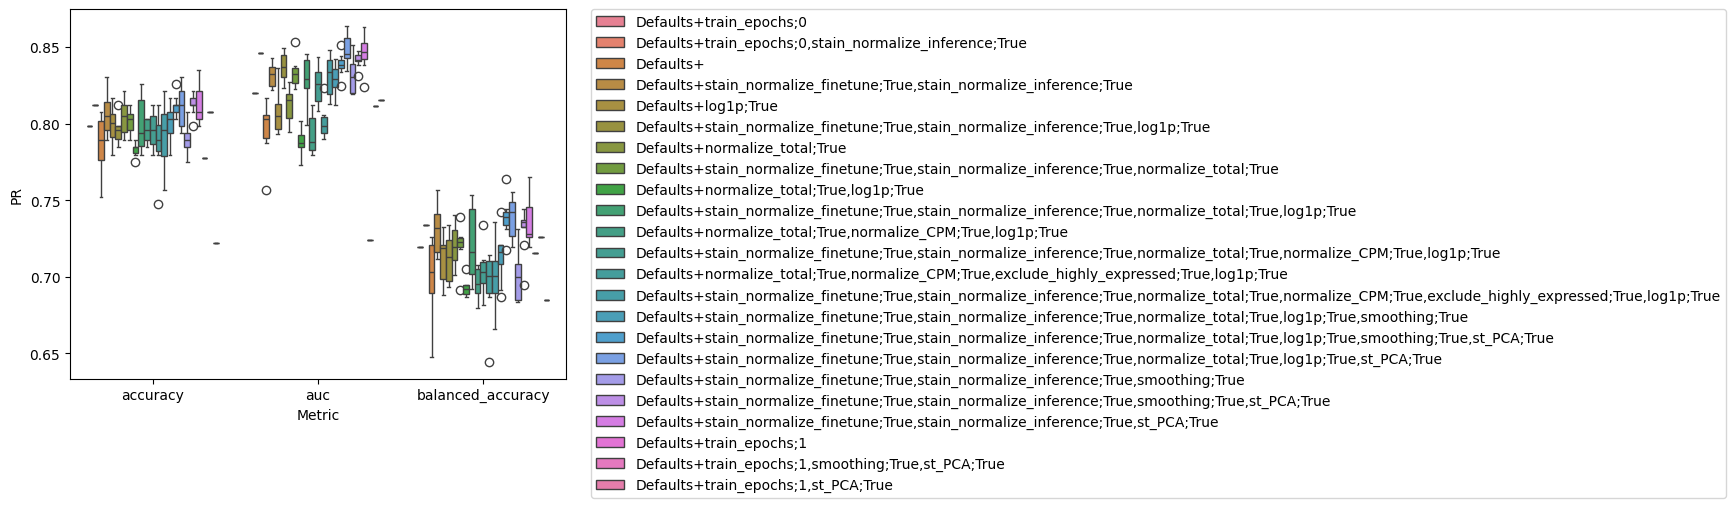

In [33]:
import matplotlib.pyplot as plt
sns.boxplot(data=df, x='Metric', y='PR', hue='experiment', hue_order=experiment_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

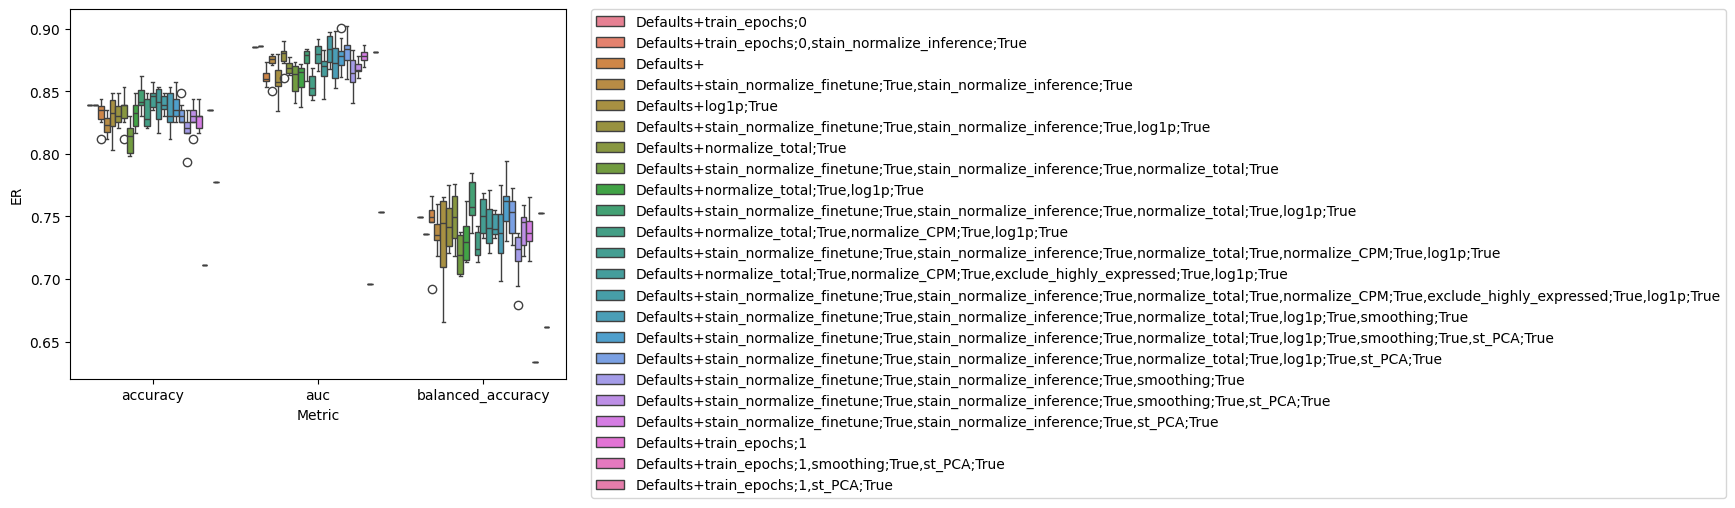

In [34]:
sns.boxplot(data=df, x='Metric', y='ER', hue='experiment', hue_order=experiment_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

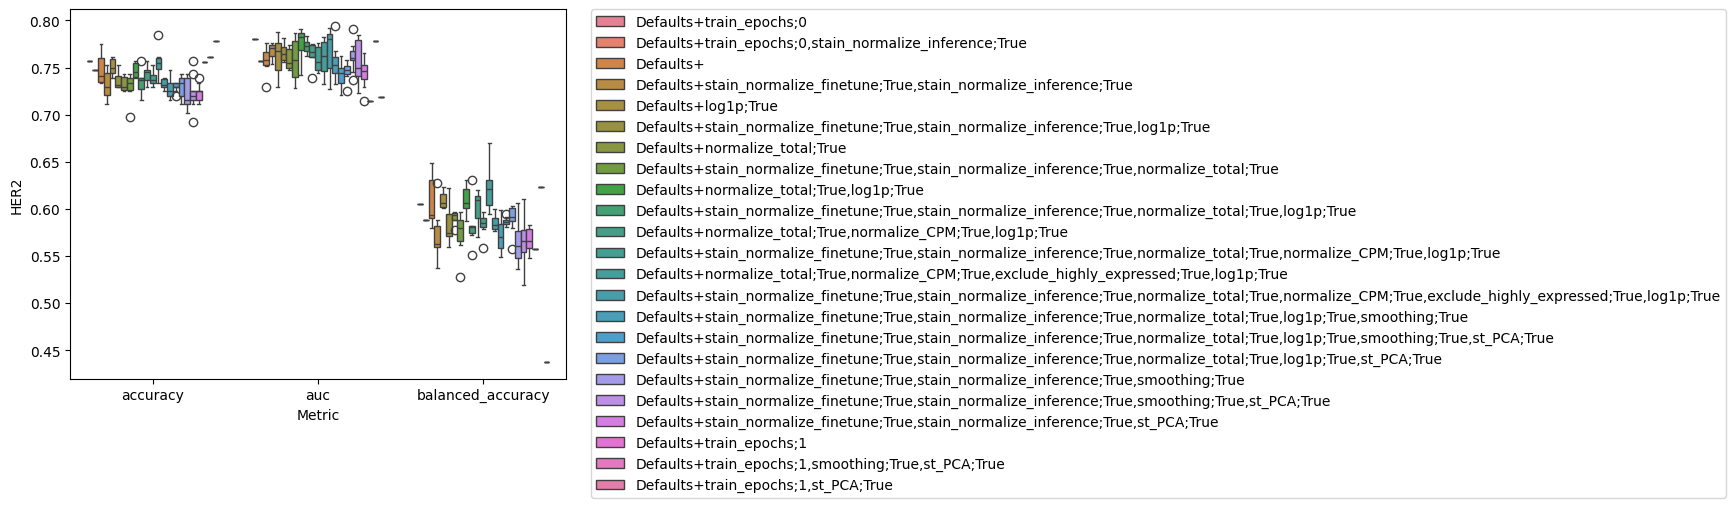

In [42]:
sns.boxplot(data=df, x='Metric', y='HER2', hue='experiment', hue_order=experiment_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

,Model,Seed,Metric,ER,PR,HER2,experiment,round
1,finetuned_model,42,auc,0.855653,0.793255,0.741772,Defaults+log1p;True,20250216_041858
1,finetuned_model,42,auc,0.858665,0.812572,0.772046,Defaults+log1p;True,20250216_041631
1,finetuned_model,42,auc,0.853568,0.812363,0.762553,Defaults+log1p;True,20250216_044439
1,finetuned_model,42,auc,0.869903,0.797014,0.788186,Defaults+log1p;True,20250220_084049
1,finetuned_model,42,auc,0.879866,0.836170,0.777426,Defaults+log1p;True,20250219_234357
...,...,...,...,...,...,...,...,...
1,finetuned_model,42,auc,0.857854,0.787407,0.768671,Defaults+,20250215_162111
1,finetuned_model,42,auc,0.853568,0.756813,0.729641,Defaults+,20250215_154701
1,finetuned_model,42,auc,0.861330,0.816853,0.760654,Defaults+,20250219_234358
1,finetuned_model,42,auc,0.858434,0.801086,0.755169,Defaults+,20250215_154713


Top 10 AUC scores by average across ER, PR, and HER2:


,experiment,round,ER,PR,HER2,avg_score
1,"Defaults+stain_normalize_finetune;True,stain_n...",20250226_035320,0.898170,0.842122,0.794093,0.844795
1,"Defaults+stain_normalize_finetune;True,stain_n...",20250220_172834,0.894578,0.842853,0.785970,0.841134
1,"Defaults+stain_normalize_finetune;True,stain_n...",20250225_203453,0.882878,0.839198,0.790823,0.837633
1,"Defaults+stain_normalize_finetune;True,stain_n...",20250220_004556,0.892261,0.843792,0.774578,0.836877
1,"Defaults+stain_normalize_finetune;True,stain_n...",20250226_025808,0.897359,0.862901,0.746941,0.835733
1,"Defaults+stain_normalize_finetune;True,stain_n...",20250225_180427,0.892841,0.851624,0.762553,0.835672
1,"Defaults+stain_normalize_finetune;True,stain_n...",20250220_094006,0.873610,0.852981,0.779641,0.835411
1,"Defaults+stain_normalize_finetune;True,stain_n...",20250219_230401,0.882530,0.842748,0.780907,0.835395
1,"Defaults+stain_normalize_finetune;True,stain_n...",20250220_183631,0.897127,0.830323,0.776477,0.834642
1,"Defaults+stain_normalize_finetune;True,stain_n...",20250220_004556,0.874768,0.836692,0.792194,0.834551


/tmp/ipykernel_2530/4183633572.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


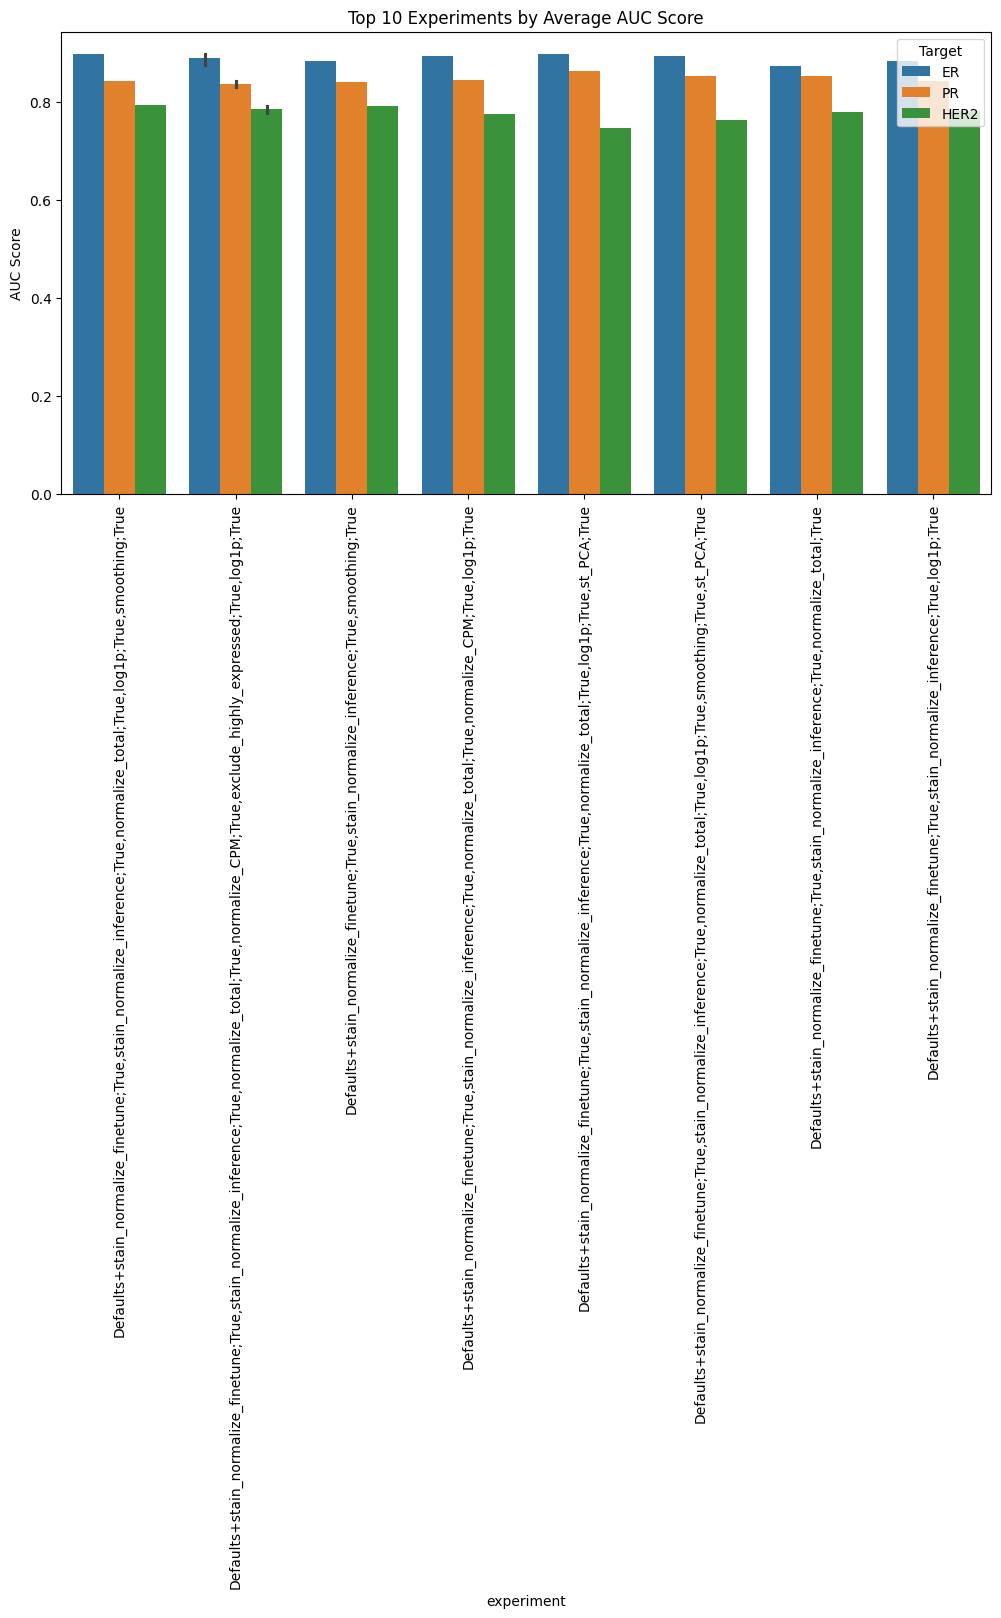

In [45]:
# Filter the data for AUC metric
auc_data = df[df['Metric'] == 'auc'].copy()
display(auc_data)

# Sort by average score across all target variables (ER, PR, HER2)
auc_data['avg_score'] = auc_data[['ER', 'PR', 'HER2']].mean(axis=1)
top_10_auc = auc_data.sort_values('avg_score', ascending=False).head(10)

# Display the top 10 AUC scores with their corresponding experiments
print("Top 10 AUC scores by average across ER, PR, and HER2:")
display(top_10_auc[['experiment', 'round', 'ER', 'PR', 'HER2', 'avg_score']])

# Visualize the top 10 experiments by AUC score
plt.figure(figsize=(12, 6))
top_experiments = top_10_auc['experiment'].unique()
sns.barplot(data=top_10_auc.melt(id_vars=['experiment', 'avg_score'], 
                                value_vars=['ER', 'PR', 'HER2'],
                                var_name='Target', value_name='AUC Score'),
           x='experiment', y='AUC Score', hue='Target')
plt.xticks(rotation=90)
plt.title('Top 10 Experiments by Average AUC Score')
plt.tight_layout()

Top 10 experiment configurations by average AUC:


,experiment,ER,PR,HER2,avg_score
19,"Defaults+train_epochs;0,stain_normalize_infere...",0.886585,0.846090,0.756435,0.829703
18,Defaults+train_epochs;0,0.885774,0.819777,0.780380,0.828643
13,"Defaults+stain_normalize_finetune;True,stain_n...",0.883438,0.831036,0.767722,0.827398
7,"Defaults+stain_normalize_finetune;True,stain_n...",0.877916,0.837058,0.766086,0.827020
12,"Defaults+stain_normalize_finetune;True,stain_n...",0.882466,0.848677,0.746437,0.825860
9,"Defaults+stain_normalize_finetune;True,stain_n...",0.875714,0.828304,0.772416,0.825478
21,"Defaults+train_epochs;1,smoothing;True,st_PCA;...",0.881835,0.811736,0.778481,0.824017
6,"Defaults+stain_normalize_finetune;True,stain_n...",0.872200,0.831697,0.767511,0.823803
17,"Defaults+stain_normalize_finetune;True,stain_n...",0.878347,0.846287,0.743390,0.822674
16,"Defaults+stain_normalize_finetune;True,stain_n...",0.868834,0.841553,0.754841,0.821743


,experiment,ER,PR,HER2,avg_score
20,Defaults+train_epochs;1,0.695853,0.724138,0.714286,0.711425
22,"Defaults+train_epochs;1,st_PCA;True",0.753846,0.815385,0.718750,0.762660
5,"Defaults+normalize_total;True,normalize_CPM;Tr...",0.854688,0.792976,0.763537,0.803734
0,Defaults+,0.861735,0.795552,0.757050,0.804779
3,"Defaults+normalize_total;True,log1p;True",0.860171,0.787929,0.775105,0.807735
1,Defaults+log1p;True,0.858723,0.807925,0.761797,0.809482
4,"Defaults+normalize_total;True,normalize_CPM;Tr...",0.867122,0.801399,0.760461,0.809661
2,Defaults+normalize_total;True,0.869285,0.812119,0.758703,0.813369
8,"Defaults+stain_normalize_finetune;True,stain_n...",0.859978,0.833699,0.758158,0.817278
15,"Defaults+stain_normalize_finetune;True,stain_n...",0.864316,0.830555,0.761556,0.818809


/tmp/ipykernel_2530/1292214217.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


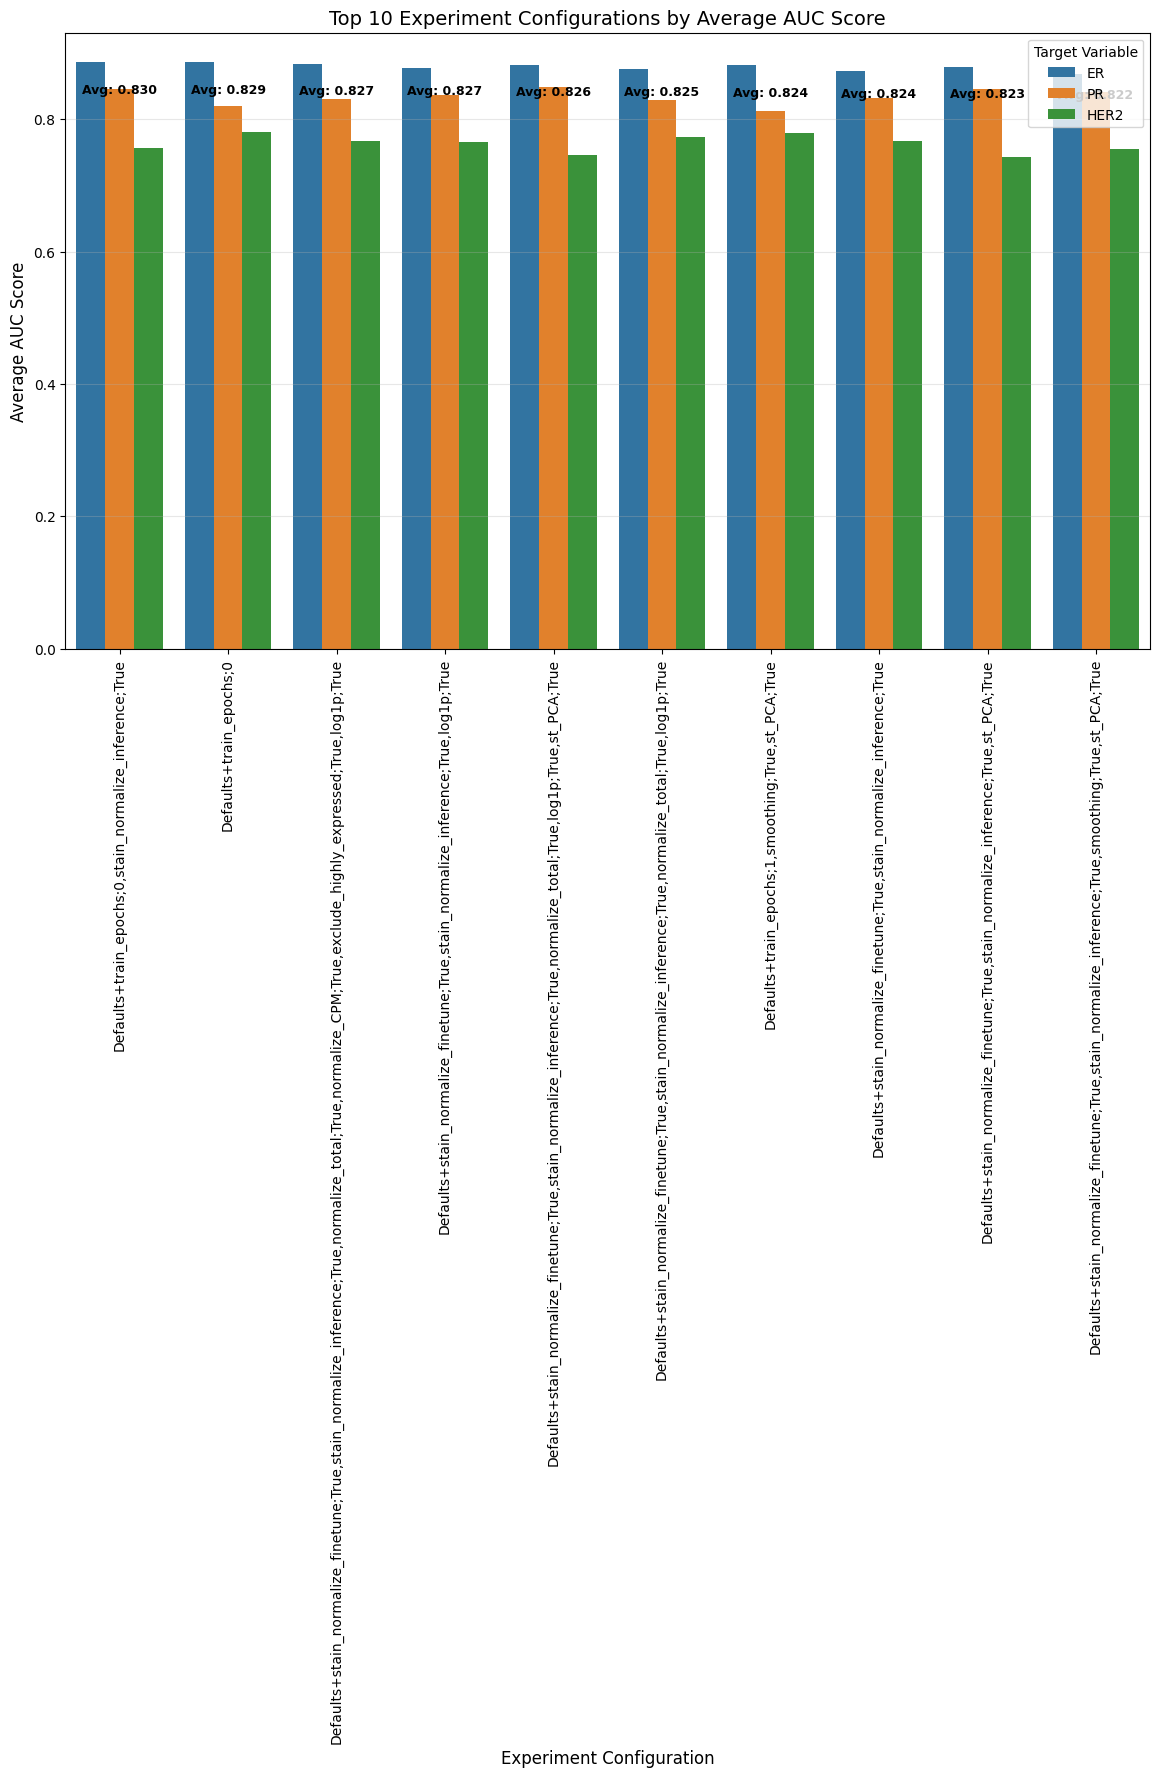

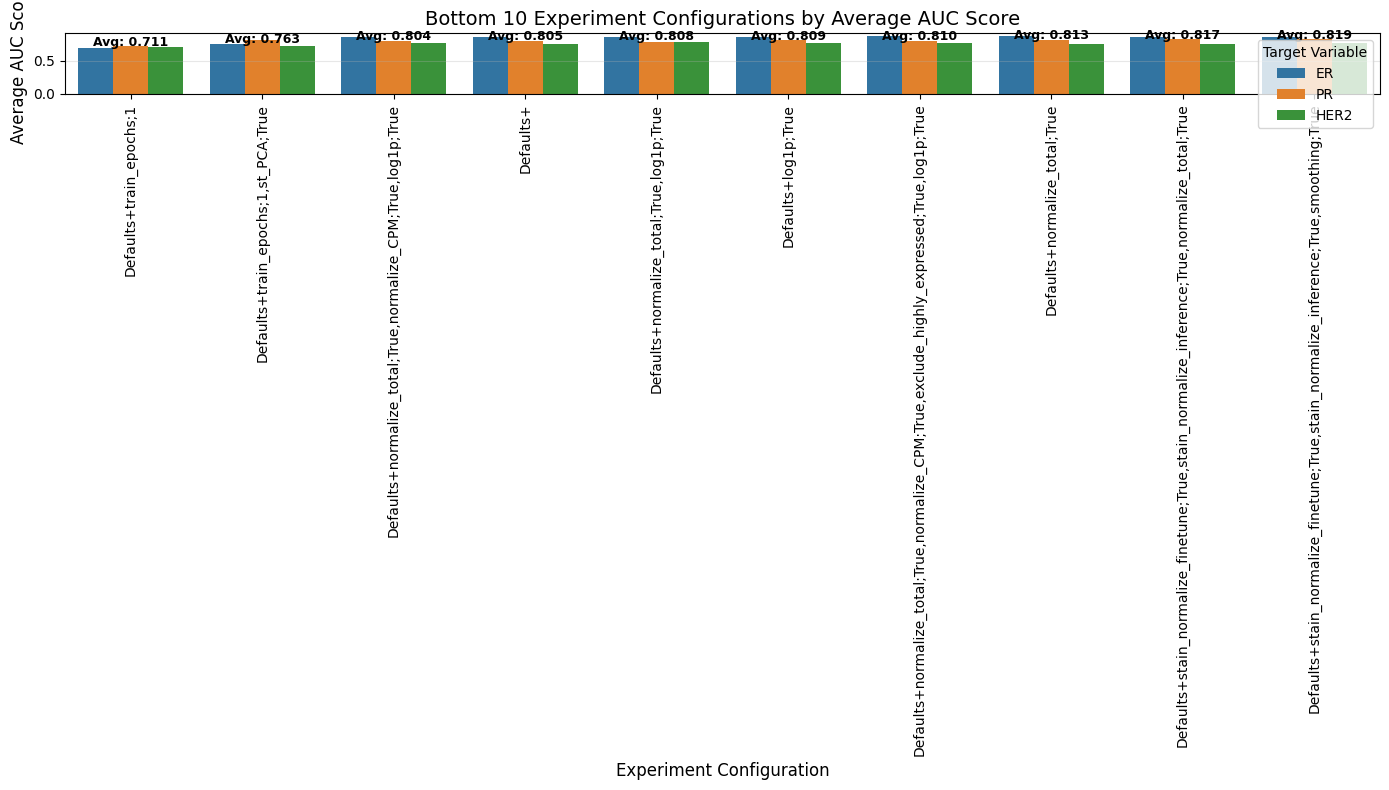

In [48]:
# Filter the data for AUC metric
auc_data = df[df['Metric'] == 'auc'].copy()

# Group by experiment and calculate average scores
grouped_auc = auc_data.groupby('experiment')[['ER', 'PR', 'HER2']].mean().reset_index()
grouped_auc['avg_score'] = grouped_auc[['ER', 'PR', 'HER2']].mean(axis=1)

# Sort by average score across all target variables
top_10_experiments = grouped_auc.sort_values('avg_score', ascending=False).head(10)
bottom_10_experiments = grouped_auc.sort_values('avg_score', ascending=True).head(10)

# Display the top 10 AUC scores with their corresponding experiments
print("Top 10 experiment configurations by average AUC:")
display(top_10_experiments)
display(bottom_10_experiments)

# Visualize the top 10 experiments by average AUC score
plt.figure(figsize=(14, 8))
melted_data = top_10_experiments.melt(id_vars=['experiment', 'avg_score'], 
                          value_vars=['ER', 'PR', 'HER2'],
                          var_name='Target', value_name='AUC Score')

# Create the bar plot for top 10
sns.barplot(data=melted_data, x='experiment', y='AUC Score', hue='Target')

# Improve readability
plt.xticks(rotation=90)
plt.title('Top 10 Experiment Configurations by Average AUC Score', fontsize=14)
plt.xlabel('Experiment Configuration', fontsize=12)
plt.ylabel('Average AUC Score', fontsize=12)
plt.legend(title='Target Variable', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Add average score as text on top of grouped bars
for i, exp in enumerate(top_10_experiments['experiment']):
    plt.text(i, top_10_experiments.iloc[i]['avg_score'] + 0.01, 
             f"Avg: {top_10_experiments.iloc[i]['avg_score']:.3f}", 
             ha='center', fontsize=9, fontweight='bold')

# Now create a plot for the bottom 10
plt.figure(figsize=(14, 8))
melted_data_bottom = bottom_10_experiments.melt(id_vars=['experiment', 'avg_score'], 
                                   value_vars=['ER', 'PR', 'HER2'],
                                   var_name='Target', value_name='AUC Score')

# Create the bar plot for bottom 10
sns.barplot(data=melted_data_bottom, x='experiment', y='AUC Score', hue='Target')

# Improve readability
plt.xticks(rotation=90)
plt.title('Bottom 10 Experiment Configurations by Average AUC Score', fontsize=14)
plt.xlabel('Experiment Configuration', fontsize=12)
plt.ylabel('Average AUC Score', fontsize=12)
plt.legend(title='Target Variable', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Add average score as text on top of grouped bars
for i, exp in enumerate(bottom_10_experiments['experiment']):
    plt.text(i, bottom_10_experiments.iloc[i]['avg_score'] + 0.01, 
             f"Avg: {bottom_10_experiments.iloc[i]['avg_score']:.3f}", 
             ha='center', fontsize=9, fontweight='bold')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Defaults+train_epochs;0'),
  Text(1, 0, 'Defaults+train_epochs;0,stain_normalize_inference;True'),
  Text(2, 0, 'Defaults+'),
  Text(3, 0, 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True'),
  Text(4, 0, 'Defaults+log1p;True'),
  Text(5, 0, 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,log1p;True'),
  Text(6, 0, 'Defaults+normalize_total;True'),
  Text(7, 0, 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True'),
  Text(8, 0, 'Defaults+normalize_total;True,log1p;True'),
  Text(9, 0, 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,log1p;True'),
  Text(10, 0, 'Defaults+normalize_total;True,normalize_CPM;True,log1p;True'),
  Text(11, 0, 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_tota

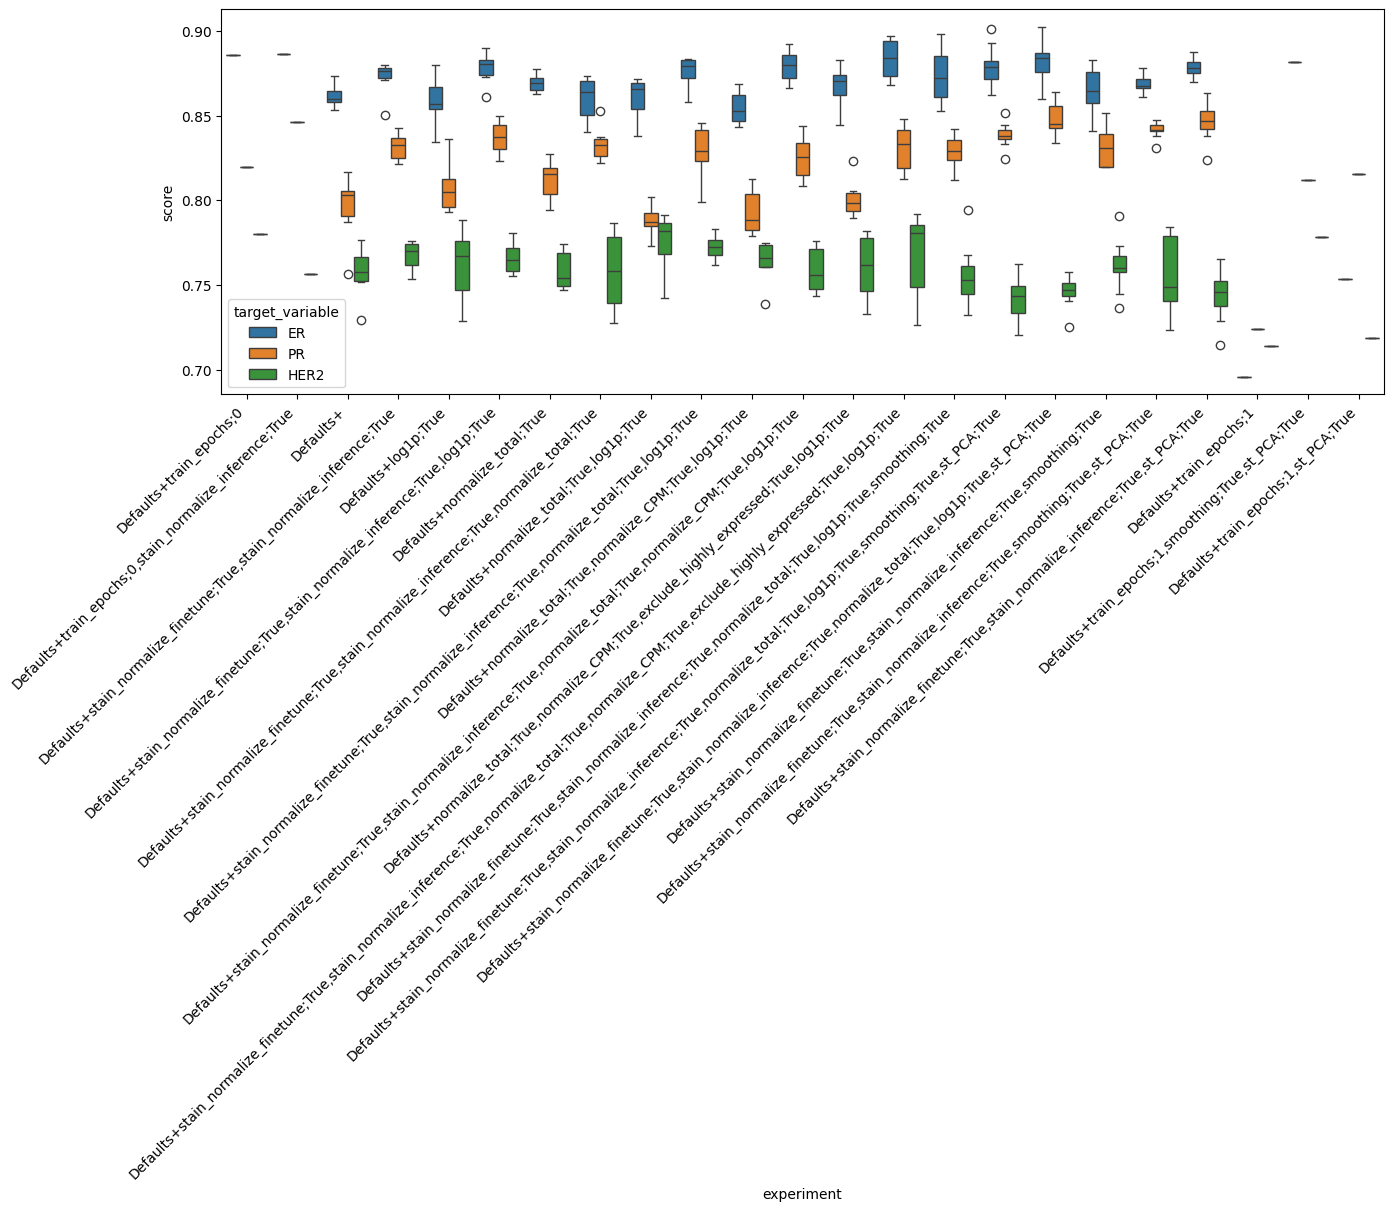

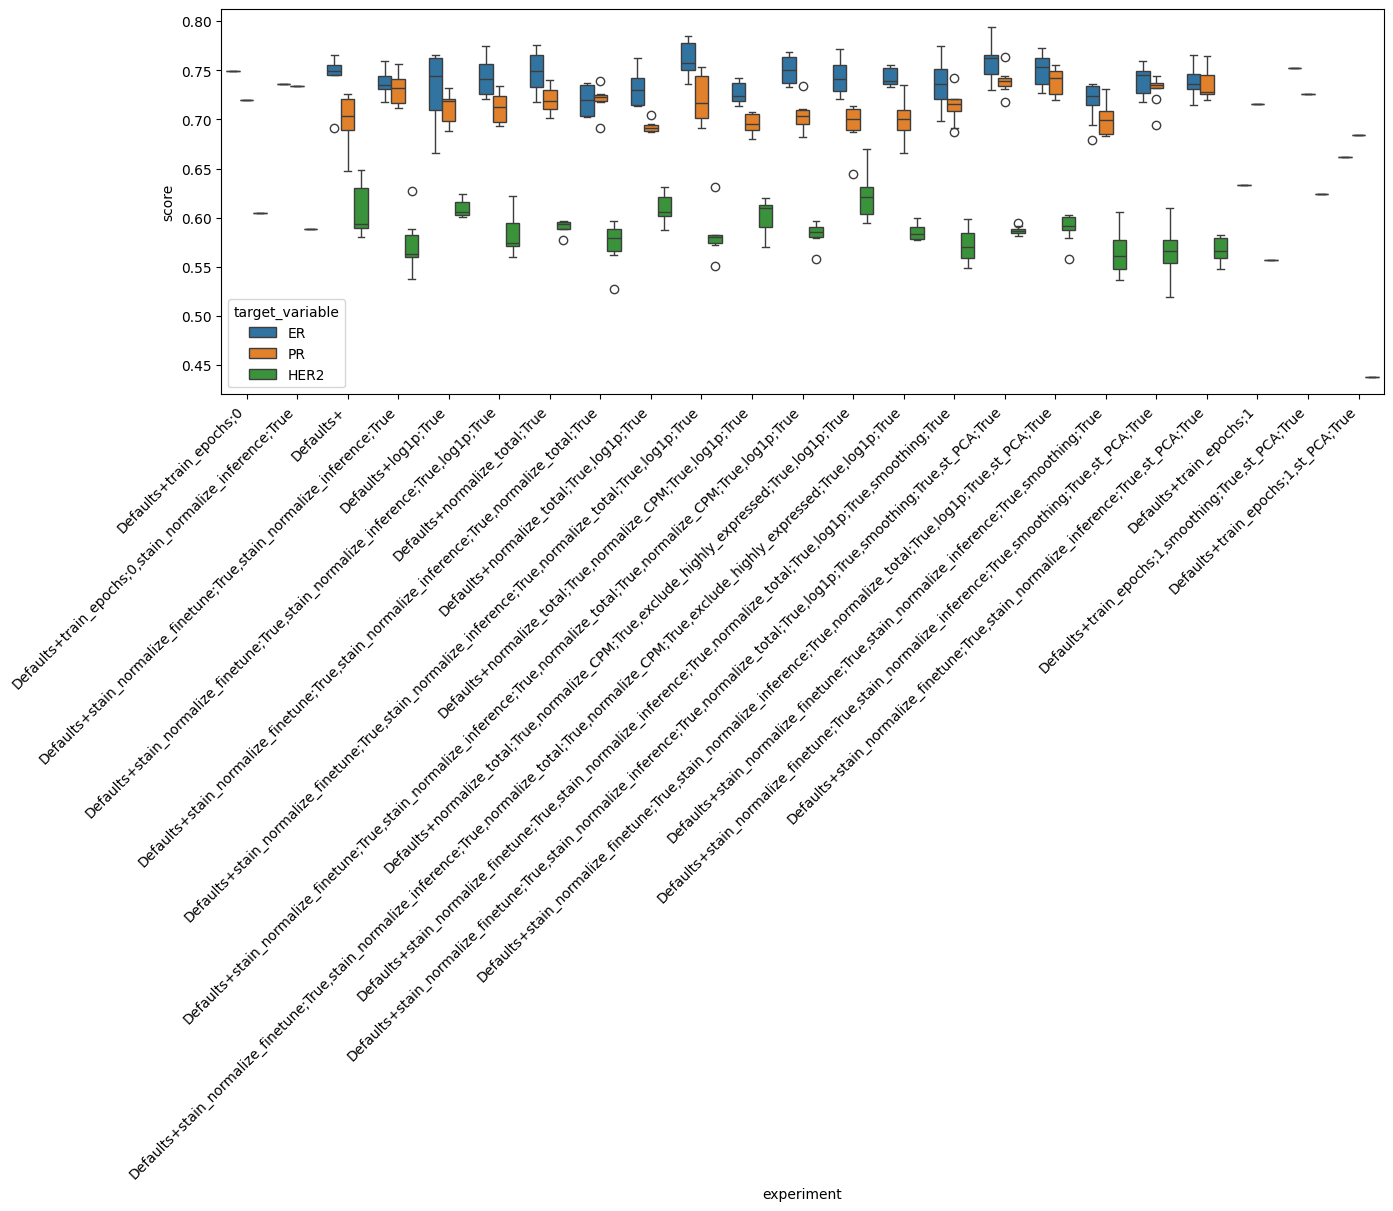

In [36]:
df_long = df.melt(id_vars=['Model', 'Seed', 'Metric', 'experiment', 'round'], var_name='target_variable', value_name='score')

fig = plt.figure(figsize=(15, 5))
sns.boxplot(data=df_long[df_long.Metric == 'auc'], x='experiment', y='score', hue='target_variable', order=experiment_order)
plt.xticks(rotation=45, ha='right')

fig = plt.figure(figsize=(15, 5))
sns.boxplot(data=df_long[df_long.Metric == 'balanced_accuracy'], x='experiment', y='score', hue='target_variable', order=experiment_order)
plt.xticks(rotation=45, ha='right')